In [7]:
import kagglehub
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/car-evaluation-data-set
['car_evaluation.csv']


In [9]:
df = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')

In [10]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
df.dtypes

,0
vhigh,object
vhigh.1,object
2,object
2.1,object
small,object
low,object
unacc,object


In [12]:
df['low'].unique()

array(['med', 'high', 'low'], dtype=object)

In [13]:
df['vhigh'] = df['vhigh'].map({'vhigh':4,'high':3,'med':2,'low':1})

In [14]:
df['vhigh.1'] = df['vhigh.1'].map({'vhigh':4,'high':3,'med':2,'low':1})

In [15]:
df['2'] = df['2'].map({'5more':6,'4':4,'3':3,'2':2})

In [16]:
df['2.1'] = df['2.1'].map({'2':2, '4':4,'more':0})

In [17]:
df['small'] = df['small'].map({'small':1,'med':2,'big':3})

In [18]:
df['low'] = df['low'].map({'low':1,'med':2,'high':3})

In [19]:
df['unacc'] = df['unacc'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

In [20]:
df.dtypes #changed datatypes

,0
vhigh,int64
vhigh.1,int64
2,int64
2.1,int64
small,int64
low,int64
unacc,int64


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.shape

(1727, 7)

In [23]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,4,4,2,2,1,2,0
1,4,4,2,2,1,3,0
2,4,4,2,2,2,1,0
3,4,4,2,2,2,2,0
4,4,4,2,2,2,3,0
...,...,...,...,...,...,...,...
1722,1,1,6,0,2,2,2
1723,1,1,6,0,2,3,3
1724,1,1,6,0,3,1,0
1725,1,1,6,0,3,2,2


In [24]:
x = df.drop('unacc',axis=1)
y = df['unacc']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred = dt.predict(x_test)

In [29]:
accuracy_score(y_test,pred) #good score but maybe overfit

0.976878612716763

In [30]:
cm = confusion_matrix(y_test,pred)

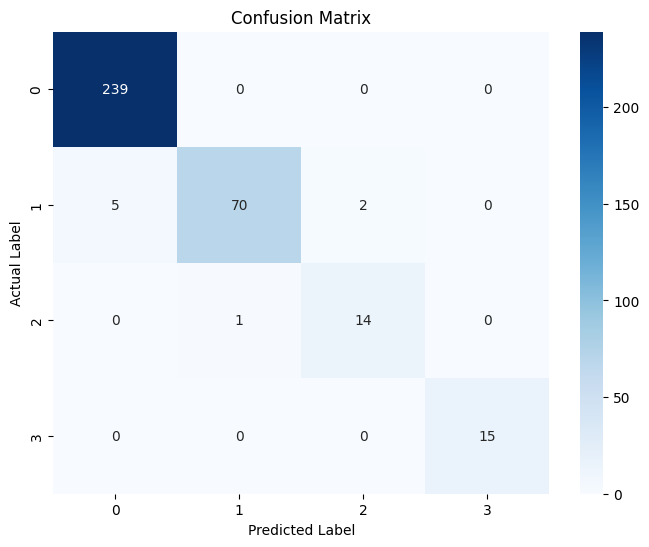

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,4,8,10,13,None],
    'max_features':['sqrt','log2',None],
    'min_samples_leaf':[1,2,3,4,5],
}
reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
reg.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, 13, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [34]:
reg.best_score_

np.float64(0.9637916601266154)

In [35]:
reg.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,4,8,10,13,None],
    'max_features':['sqrt','log2',None],
    'min_samples_leaf':[1,2,3,4,5],
}
reg = RandomizedSearchCV(DecisionTreeClassifier(),n_iter=10,cv=5,random_state=4,param_distributions=param_grid)
reg.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 13, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']},
                   random_state=4)

In [38]:
reg.best_score_

np.float64(0.9514702035263957)

In [39]:
reg.best_params_

{'splitter': 'random',
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 13,
 'criterion': 'entropy'}

In [40]:
for  importance, name in sorted(zip(dt.feature_importances_,x.columns),reverse=True):
    print(name,importance) #highest importance of low and then so and so on

low 0.24586103462040487
2.1 0.22943117922081274
vhigh.1 0.18000119425262825
small 0.15069195660320478
vhigh 0.1184987467157373
2 0.07551588858721205
